# Wide and Deep Networks for Bank Marketing Data

#### Minho Song

### 1. Data Selection

Bank Marketing data from Machine Learning Repository, the Univercity of California, Irvine is selected for this task. The dataset initially contains 16 features and 45211 instances with mixed categorical and integer values. However, I will remove the instances with missing data, considering the size of instances required by the assignment.<br><br>
The goal of this dataset is to predict whether a client opens a term deposit in response to a marketing campaign from banks.<br>

Source: Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

### 2. Preparation

#### 2.1. Loading Data

In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# # metadata 
# print(bank_marketing.metadata) 
  
# # variable information 
# print(bank_marketing.variables) 


In [34]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 

#### 2.2. Preprocessing

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Combine the features and target to perform preprocessing
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)


In [36]:
# Remove the instances with missing data
df.dropna(axis=0, how='any', inplace=True)

# Remove unnecessary columns
df.drop(['contact','day_of_week','month','duration'], axis=1, inplace=True)

# Drop duplicates
unique_df = df.drop_duplicates()

categorical_headers = ['job','marital','education','default','housing','loan','poutcome']

numeric_headers = ['age','balance','campaign','pdays','previous']

# Separate target from features
X = unique_df.iloc[:, :-1]
y = unique_df.iloc[:, -1] 
tmp = LabelEncoder()
y = tmp.fit_transform(y)
y = pd.Series(y)
X[numeric_headers] = X[numeric_headers].to_numpy().astype(float)
print(X.head())
print("===================================================")
print(y)


        age         job  marital  education default  balance housing loan  \
24060  33.0      admin.  married   tertiary      no    882.0      no   no   
24062  42.0      admin.   single  secondary      no   -247.0     yes  yes   
24064  33.0    services  married  secondary      no   3444.0     yes   no   
24072  36.0  management  married   tertiary      no   2415.0     yes   no   
24077  36.0  management  married   tertiary      no      0.0     yes   no   

       campaign  pdays  previous poutcome  
24060       1.0  151.0       3.0  failure  
24062       1.0  166.0       1.0    other  
24064       1.0   91.0       4.0  failure  
24072       1.0   86.0       4.0    other  
24077       1.0  143.0       3.0  failure  
0       0
1       1
2       1
3       0
4       1
       ..
7837    0
7838    1
7839    1
7840    1
7841    0
Length: 7842, dtype: int32


In [37]:
X.head()

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome
24060,33.0,admin.,married,tertiary,no,882.0,no,no,1.0,151.0,3.0,failure
24062,42.0,admin.,single,secondary,no,-247.0,yes,yes,1.0,166.0,1.0,other
24064,33.0,services,married,secondary,no,3444.0,yes,no,1.0,91.0,4.0,failure
24072,36.0,management,married,tertiary,no,2415.0,yes,no,1.0,86.0,4.0,other
24077,36.0,management,married,tertiary,no,0.0,yes,no,1.0,143.0,3.0,failure


From above data description, I found that some features such as contact(communication type), day_of_week, month are less relevant to predict the target than other features and decided to remove those columns.<br>
In addition, duration feature affects the target by showing the connection between "duration = 0" and "y = 0", yet for the realistic predictive model, I decided to remove duration feature as well

In [38]:
X.describe()

,age,balance,campaign,pdays,previous
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,1552.343280,2.064269,223.252869,3.184264
std,11.282964,3084.580003,1.566109,111.830127,4.614190
min,18.000000,-1884.000000,1.000000,1.000000,1.000000
25%,32.000000,162.000000,1.000000,133.000000,1.000000
50%,38.000000,595.000000,2.000000,195.000000,2.000000
75%,47.000000,1733.750000,2.000000,326.000000,4.000000
max,89.000000,81204.000000,16.000000,871.000000,275.000000


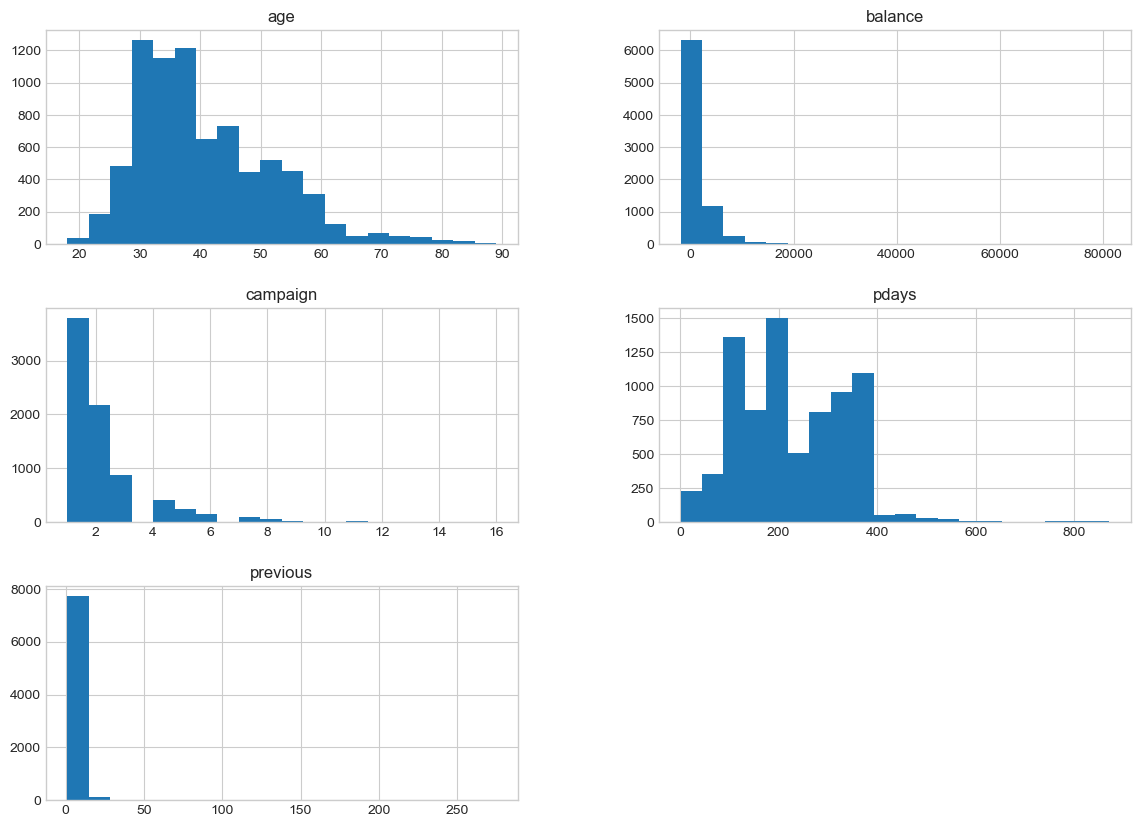

In [39]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

X.hist(bins=20, figsize=(14,10))
plt.show()

Above histograms show that the data is pretty imbalanced

In [40]:
# Checking unique values
for col in X:
    print(f'{col} has {len(df[col].unique())} unique values.')

age has 70 unique values.
job has 11 unique values.
marital has 3 unique values.
education has 3 unique values.
default has 2 unique values.
balance has 3090 unique values.
housing has 2 unique values.
loan has 2 unique values.
campaign has 16 unique values.
pdays has 527 unique values.
previous has 39 unique values.
poutcome has 3 unique values.


In [41]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [42]:
# create a tensorflow dataset, for ease of use later
batch_size = 32
def create_dataset_from_dataframe(input, label, batch_size):

    df = input.copy()
    
    df = {key: input[key].values[:, np.newaxis] for key in categorical_headers + numeric_headers}

    labels = label.values

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds


In [43]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Convert the dataset into tensor
print(type(X_train)) 
print(type(y_train))

ds_train = create_dataset_from_dataframe(X_train, y_train, batch_size)
ds_test = create_dataset_from_dataframe(X_test,y_test, batch_size)
print(ds_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<_PrefetchDataset element_spec=({'job': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'marital': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'education': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'default': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'housing': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'loan': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'poutcome': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'balance': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'campaign': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'pdays': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'previous': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


The data seems okay with the conversion to tensors.

In [33]:
# here is an example of what the data looks like from this class
[(feat,label)] = ds_train.take(1)
print('The keys in the feature data are:')
print(feat.keys())
print('\nThe feature shape for age is:')
print('Shape:',feat['age'].shape)
print('Max:',max(feat['age']))
print('\nThe labels for this batch are:')
print(label) # print one batch of the labels 

The keys in the feature data are:
dict_keys(['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'age', 'balance', 'campaign', 'pdays', 'previous'])

The feature shape for age is:
Shape: (32, 1)
Max: tf.Tensor([74.], shape=(1,), dtype=float64)

The labels for this batch are:
tf.Tensor([0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0], shape=(32,), dtype=int32)


In [13]:
from tensorflow.keras.layers import Dense, Activation, Input, Lambda
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow import keras

Numeric values work fine with the Keras model

In [14]:
from tensorflow.keras.utils import FeatureSpace

feature_space = FeatureSpace(
    features={
    # Categorical feature encoded as string
        "job": FeatureSpace.string_categorical(num_oov_indices=0),
        "marital": FeatureSpace.string_categorical(num_oov_indices=0),
        "education": FeatureSpace.string_categorical(num_oov_indices=0),
        "default": FeatureSpace.string_categorical(num_oov_indices=0),
        "housing": FeatureSpace.string_categorical(num_oov_indices=0),
        "loan": FeatureSpace.string_categorical(num_oov_indices=0),
        "poutcome": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numerical features to make discrete, make into integer with max val
        "age": FeatureSpace.float_discretized(num_bins=7),
        'balance': FeatureSpace.float_discretized(num_bins=10),
              
        # Numerical features to normalize
        "campaign": FeatureSpace.float_normalized(),
        "pdays": FeatureSpace.float_normalized(),
        "previous": FeatureSpace.float_normalized(),
    },
    
    crosses=[
        FeatureSpace.cross(
            feature_names=('housing','loan'),  
            crossing_dim=2*2),
        FeatureSpace.cross(
            feature_names=('poutcome','previous'),  
            crossing_dim=3*39),
        FeatureSpace.cross(
            feature_names=('job','loan'),  
            crossing_dim=11*2)
    ],
    output_mode="concat", # can also be a dict, processed internally
)


In [15]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = ['age', 'job', 'marital','education','default','balance', 'housing','loan','campaign','pdays','previous','poutcome','housing_loan','poutcome_previous', 'job_loan']
data_des['Description'] = ['age', 'type of job', 'marital status',
                          'education', 'has credit in default?', 'average yearly balance',
                          'has housing loan?', 'has personal loan?',
                          'number of contacts performed during this campaign and for this client ','number of days that passed by after the client was last contacted from a previous campaign',
                          'number of contacts performed before this campaign and for this client','outcome of the previous marketing campaign', 'housing loan with personal loan', 'past outcome with previous contact', 'job with personal loan' ]
data_des['Type'] = ['Integer'] + ['Categorical'] * 3 + ['Binary']+ ['Integer'] + ['Binary'] * 2 + ['Integer'] * 3 + ['Categorical'] + ['Crossed'] * 3
data_des['Range'] = ['numeric']+['admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed'] + ['divorced, married, single' ] + ['primary, secondary, tertiary'] + ['no, yes'] +['numeric']+ ['no, yes'] + ['no, yes']  +['numeric'] * 3 + ['failure, nonexistent, success'] + ['Crossed']*3
data_des

,Features,Description,Type,Range
0,age,age,Integer,numeric
1,job,type of job,Categorical,"admin, blue-collar, entrepreneur, housemaid, m..."
2,marital,marital status,Categorical,"divorced, married, single"
3,education,education,Categorical,"primary, secondary, tertiary"
4,default,has credit in default?,Binary,"no, yes"
5,balance,average yearly balance,Integer,numeric
6,housing,has housing loan?,Binary,"no, yes"
7,loan,has personal loan?,Binary,"no, yes"
8,campaign,number of contacts performed during this campa...,Integer,numeric
9,pdays,number of days that passed by after the client...,Integer,numeric


#### Crossed_features

For the crossed features, I chose one for housing and loan, another for poutcome and previous, and the other for job and loan.<br>
The reason for first crossed feature is if you have housing loan and personal loan at the same time, your chance of need for liquidable money is high, meaning not likely to subscribe a term deposit.<br>
Past outcome and the number of contanct before this campaign can highly affect the outcome. If the successful outcome can be found with the higher number of contacts, then the client is more likely to favorably respond to this campaign with more contacts.<br>
The third is also the facts that can affect the client's capability to put a term deposit aside for the bank. Low income job with personal loan will drop the likelihood of the client's subscribing a term deposit.<br>

I am going to use 15 features related to the prediction of the output target in this assignment.<br>
The features have 3 crossed features, 4 categorical, 3 binary, and 5 integer types.<br><br>
The number of instances is 7842 after removing duplicates and instances with missing data and duplicates.<br>

#### Metrics:

For evaluation metrics, recall or precision could be used for this predition task.<br> High recall scores mean that you are identifying most of the clients who would subscribe.<br> However, the cost of false negative is not very high in the marketing business.<br>
Whereas, Precision evaluates true positives among predicted positives.<br> 
By doing so, you can target most of the customers who are likely to favorably respond to the campaign, which is cost-effective.<br><br>
Threfore, precision will be used for evaluation metrics for this task.


#### Cross-Validation:


For cross-validation, I am splitting the data with 'train_test_split' and creating a nested cross-validation with traditional 80-20 split and stratified k folds.<br>
The distribution of dataset shows the imbalance of data.<br>
Stratified cross-validation will ensure that each fold represents the overall distribution.<br><br>
ShuffleSplitting is simple to use but the method is not appropriate for this task due to the present imbalance distribution of dataset, where the maintaining proportion is a key to the success of the prediction task.<br><br>
Stratified k folds will help mitigate overfitting by ensuring the proportion of the dataset throughout k folds, which will improve the generalization of the model.<br><br>
By using nested cross-validation, I also try to prevent data snooping issues.


In [44]:
# Apply FeatureSpace to the data
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
# Initialize the feature map to this data
feature_space.adapt(train_ds_with_no_labels)
print(train_ds_with_no_labels)

<_MapDataset element_spec={'job': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'marital': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'education': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'default': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'housing': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'loan': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'poutcome': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'balance': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'campaign': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'pdays': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), 'previous': TensorSpec(shape=(None, 1), dtype=tf.float64, name=None)}>


In [16]:
# Set up functions for categorical data
def setup_embedding_from_crossing(feature_space, col_name):
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)),name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x
def setup_embedding_from_categorical(feature_space, col_name):
    
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)),name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 

### 3. Modeling

#### 3.1. Model building

I implemented several models using TensorFlow and Keras, focusing on both wide and deep networks. The models were evaluated based on precision scores, given the importance of targeting the right clients in a marketing campaign.

In [17]:
def build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, layer_1, layer_2, layer_3, activation = 'relu'):
    # Concatenate the outputs and add a fully connected layer
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)
    
    # merge the deep branches together
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=layer_1,activation=activation, name='deep1')(deep_branch)
    deep_branch = Dense(units=layer_2,activation=activation, name='deep2')(deep_branch)
    deep_branch = Dense(units=layer_3,activation=activation, name='deep3')(deep_branch)
    
        
    # Merge deep and wide branches
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)  
    training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["precision"]
    )
    
    return training_model

#### 3.1.1. Model Structure Check

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ job (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ marital             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ education           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ default             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ housing             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loan (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ poutcome            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ balance             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ campaign            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pdays (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ previous            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ job[0][0]         │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ marital[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ education[0][0]   │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ default[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ housing[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ loan[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 4,924 (19.25 KB)

 Trainable params: 4,915 (19.20 KB)

 Non-trainable params: 9 (48.00 B)

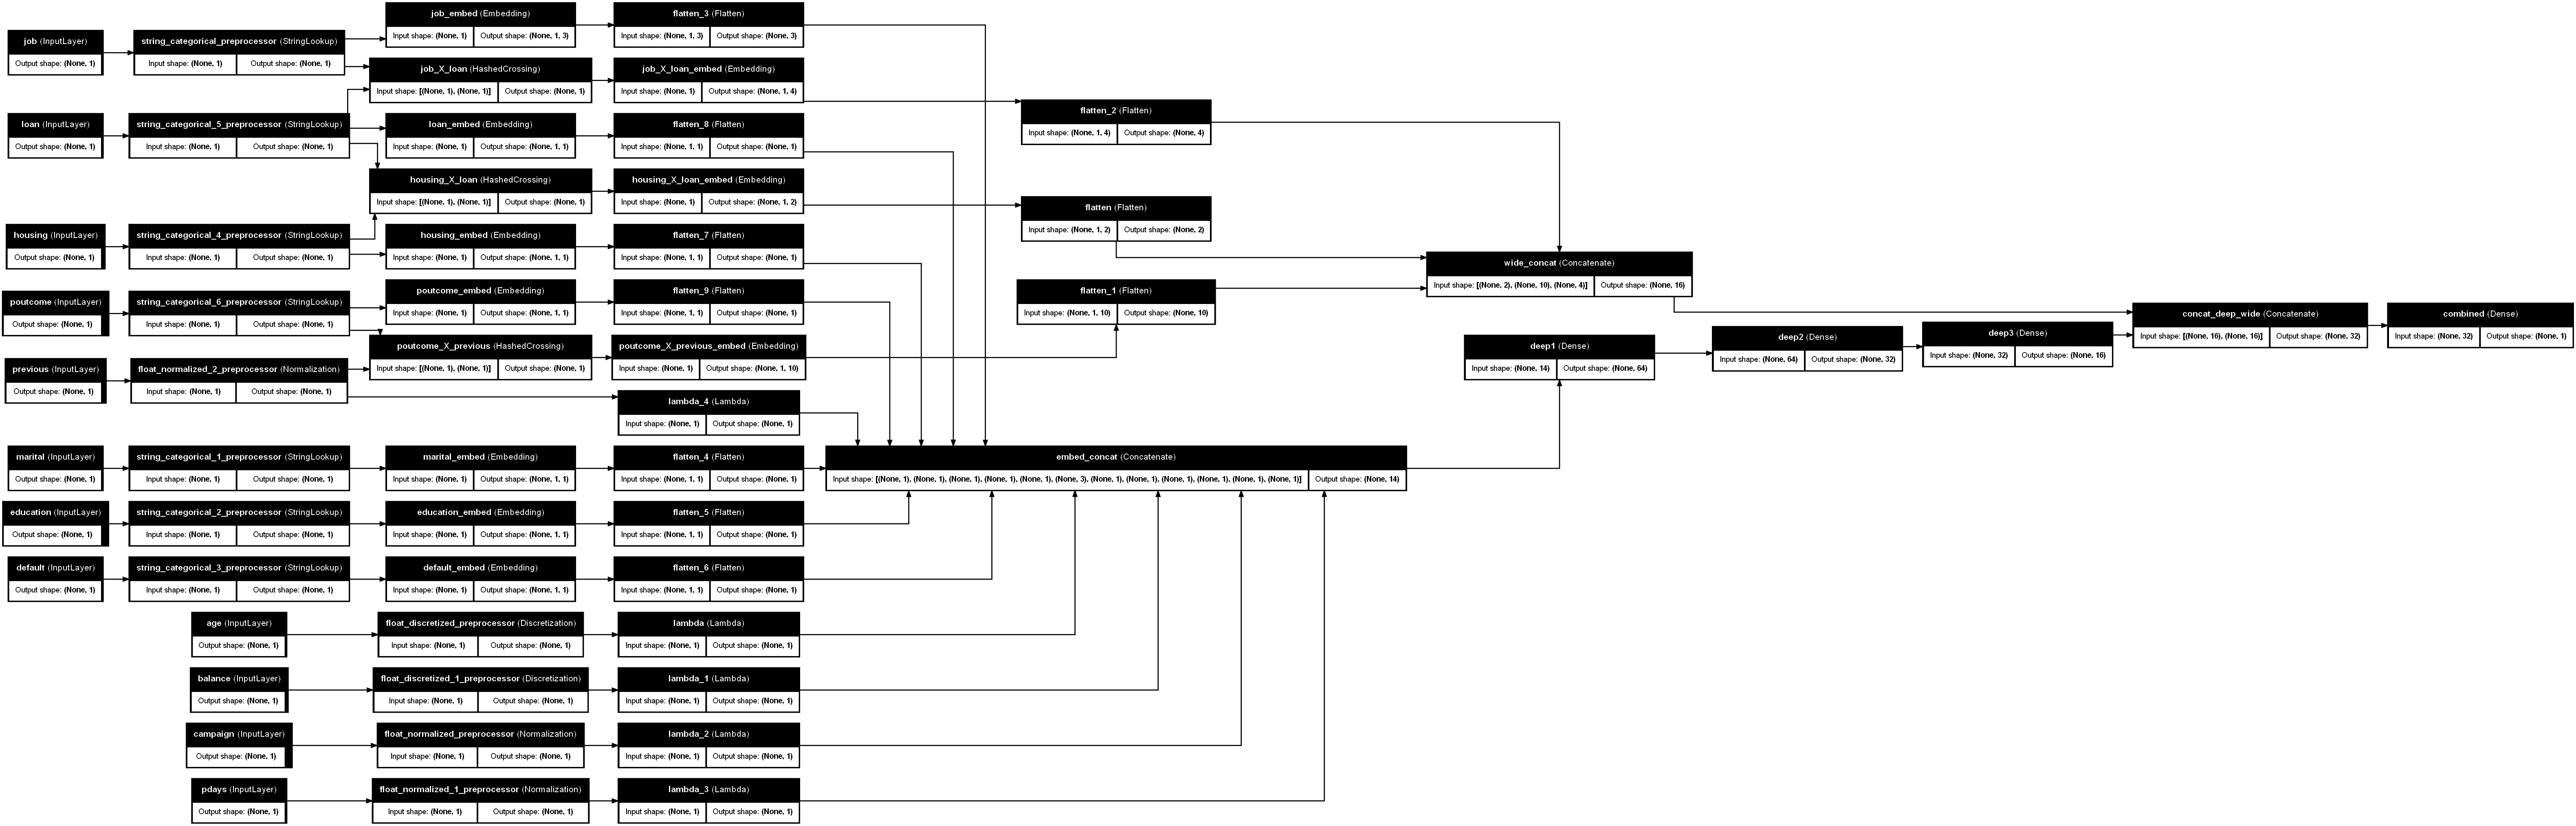

In [18]:
from sklearn.metrics import precision_score
crossed_outputs = []
all_deep_branch_outputs = []
precision_scores = []
# Getting unprocessed features here to gain access to each output
dict_inputs = feature_space.get_inputs()

# Save crossed features into crossed_outputs array  
for col in feature_space.crossers.keys():
    x = setup_embedding_from_crossing(feature_space, col)
    # Save these outputs in list to concatenate later
    crossed_outputs.append(x)

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    x = Lambda(lambda t: tf.cast(t, tf.int32))(x)
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)

    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


model = build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 64, 32, 16)

model.summary()



plot_model(
model, to_file='model.png', show_shapes=True, show_layer_names=True,
rankdir='LR', expand_nested=False, dpi=96)


The model structure is well connected all features and crossed-features.<br>
The number of total parameters is 4,915

#### 3.1.2. Base Model
- Relu
- 50, 25, 10 layers
- Embedding with square-root of N 

In [ ]:
# Use StratifiedKfold to split data into training and test sets    \
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_score
   
skf = StratifiedKFold(n_splits=10)
fold = 0
train_precision_scores = []
test_precision_scores = []

# Perform Stratified split for training data
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    ds_fold_train = create_dataset_from_dataframe(X_fold_train, y_fold_train, batch_size)
    ds_fold_test = create_dataset_from_dataframe(X_fold_test, y_fold_test, batch_size)
    
    # Apply FeatureSpace for the fold data
    ds_fold_train_with_no_labels = ds_fold_train.map(lambda x, _: x)
    feature_space.adapt(ds_fold_train_with_no_labels)
    
    fold += 1
    crossed_outputs = []
    all_deep_branch_outputs = []

    # Getting unprocessed features here to gain access to each output
    dict_inputs = feature_space.get_inputs()
    
    # Save crossed features into crossed_outputs array  
    for col in feature_space.crossers.keys():
    
        x = setup_embedding_from_crossing(feature_space, col)
        
        # Save these outputs in list to concatenate later
        crossed_outputs.append(x)

    # for each numeric variable, just add it in after embedding
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        all_deep_branch_outputs.append(x)
        
    # for each categorical variable
    for col in categorical_headers:
        
        # get the output tensor from ebedding layer
        x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
        all_deep_branch_outputs.append(x)
            
    model = build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 50, 25, 10)

    # Train the model
    model.fit(ds_fold_train, epochs=5, validation_data=ds_fold_test)

        # Evaluate and store precision scores for each epoch
    for epoch in range(5):
        # Calculate training precision
        y_train_pred = model.predict(ds_fold_train)
        y_train_pred = (y_train_pred > 0.5).astype(int)
        train_precision = precision_score(y_fold_train, y_train_pred)
        train_precision_scores.append(train_precision)

        # Calculate validation precision
        yhat = model.predict(ds_fold_test)
        yhat = (yhat > 0.5).astype(int)
        test_precision = precision_score(y_fold_test, yhat)
        test_precision_scores.append(test_precision)
    
    print(f'Fold {fold} - Precision: {test_precision}')
#     #============================================================================================================================================

    # Print average cross-validation score
print(f'Average cross-validation precision: {np.mean(test_precision_scores)}')
# Plot the training and validation precision scores
plt.figure(figsize=(10, 5))
plt.plot(train_precision_scores, label='Training Precision')
plt.plot(test_precision_scores, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

#### 3.1.3. SELU Model
- selu
- 50, 25, 10 layers
- Embedding with square-root of N 

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5502 - precision: 0.2561 - val_loss: 0.4463 - val_precision: 0.6429
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4299 - precision: 0.6490 - val_loss: 0.4290 - val_precision: 0.6500
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4201 - precision: 0.6647 - val_loss: 0.4141 - val_precision: 0.6986
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4143 - precision: 0.6752 - val_loss: 0.4069 - val_precision: 0.7089
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4114 - precision: 0.6805 - val_loss: 0.4005 - val_precision: 0.7143
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

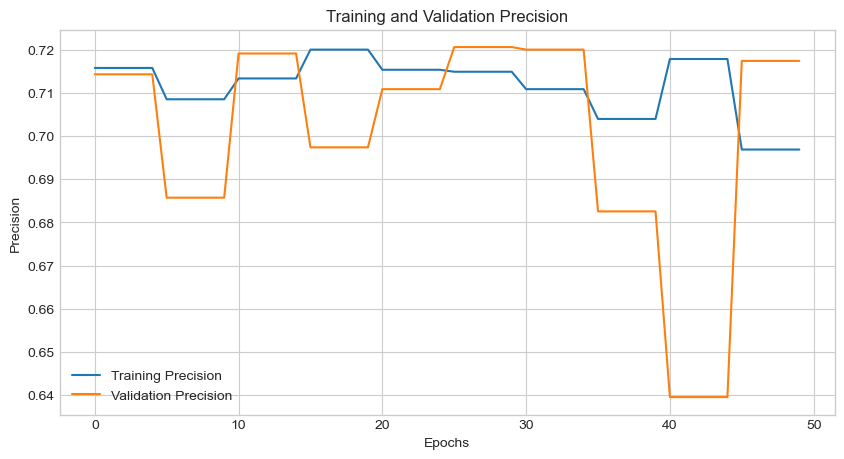

In [ ]:
# Use StratifiedKfold to split data into training and test sets    \
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_score
   
skf = StratifiedKFold(n_splits=10)
fold = 0
train_precision_scores = []
test_precision_scores = []

# Perform Stratified split for training data
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    ds_fold_train = create_dataset_from_dataframe(X_fold_train, y_fold_train, batch_size)
    ds_fold_test = create_dataset_from_dataframe(X_fold_test, y_fold_test, batch_size)
    
    # Apply FeatureSpace for the fold data
    ds_fold_train_with_no_labels = ds_fold_train.map(lambda x, _: x)
    feature_space.adapt(ds_fold_train_with_no_labels)
    
    fold += 1
    crossed_outputs = []
    all_deep_branch_outputs = []

    # Getting unprocessed features here to gain access to each output
    dict_inputs = feature_space.get_inputs()
    
    # Save crossed features into crossed_outputs array  
    for col in feature_space.crossers.keys():
    
        x = setup_embedding_from_crossing(feature_space, col)
        
        # Save these outputs in list to concatenate later
        crossed_outputs.append(x)

    # for each numeric variable, just add it in after embedding
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        all_deep_branch_outputs.append(x)
        
    # for each categorical variable
    for col in categorical_headers:
        
        # get the output tensor from ebedding layer
        x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
        all_deep_branch_outputs.append(x)
            
    model = build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 50, 25, 10, activation='selu')

    # Train the model
    model.fit(ds_fold_train, epochs=5, validation_data=ds_fold_test)

        # Evaluate and store precision scores for each epoch
    for epoch in range(5):
        # Calculate training precision
        y_train_pred = model.predict(ds_fold_train)
        y_train_pred = (y_train_pred > 0.5).astype(int)
        train_precision = precision_score(y_fold_train, y_train_pred)
        train_precision_scores.append(train_precision)

        # Calculate validation precision
        yhat = model.predict(ds_fold_test)
        yhat = (yhat > 0.5).astype(int)
        test_precision = precision_score(y_fold_test, yhat)
        test_precision_scores.append(test_precision)
    
    print(f'Fold {fold} - Precision: {test_precision}')
#     #============================================================================================================================================

    # Print average cross-validation score
print(f'Average cross-validation precision: {np.mean(test_precision_scores)}')
# Plot the training and validation precision scores
plt.figure(figsize=(10, 5))
plt.plot(train_precision_scores, label='Training Precision')
plt.plot(test_precision_scores, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

#### 3.1.4. Sigmoid Model
- sigmoid
- 50, 25, 10 layers
- Embedding with square-root of N 

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5725 - precision: 0.0000e+00 - val_loss: 0.5291 - val_precision: 0.0000e+00
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5235 - precision: 0.0000e+00 - val_loss: 0.4815 - val_precision: 0.0000e+00
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4588 - precision: 0.4890 - val_loss: 0.4140 - val_precision: 0.6860
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4150 - precision: 0.6906 - val_loss: 0.3998 - val_precision: 0.6832
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4084 - precision: 0.6778 - val_loss: 0.3945 - val_precision: 0.6893
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━

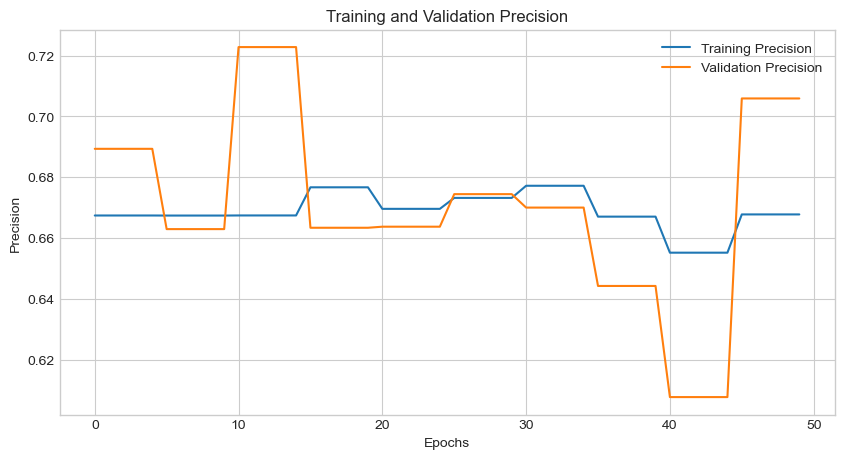

In [ ]:
# Use StratifiedKfold to split data into training and test sets    \
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_score
   
skf = StratifiedKFold(n_splits=10)
fold = 0
train_precision_scores = []
test_precision_scores = []

# Perform Stratified split for training data
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    ds_fold_train = create_dataset_from_dataframe(X_fold_train, y_fold_train, batch_size)
    ds_fold_test = create_dataset_from_dataframe(X_fold_test, y_fold_test, batch_size)
    
    # Apply FeatureSpace for the fold data
    ds_fold_train_with_no_labels = ds_fold_train.map(lambda x, _: x)
    feature_space.adapt(ds_fold_train_with_no_labels)
    
    fold += 1
    crossed_outputs = []
    all_deep_branch_outputs = []

    # Getting unprocessed features here to gain access to each output
    dict_inputs = feature_space.get_inputs()
    
    # Save crossed features into crossed_outputs array  
    for col in feature_space.crossers.keys():
    
        x = setup_embedding_from_crossing(feature_space, col)
        
        # Save these outputs in list to concatenate later
        crossed_outputs.append(x)

    # for each numeric variable, just add it in after embedding
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        all_deep_branch_outputs.append(x)
        
    # for each categorical variable
    for col in categorical_headers:
        
        # get the output tensor from ebedding layer
        x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
        all_deep_branch_outputs.append(x)
            
    model = build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 50, 25, 10, activation='sigmoid')

    # Train the model
    model.fit(ds_fold_train, epochs=5, validation_data=ds_fold_test)

        # Evaluate and store precision scores for each epoch
    for epoch in range(5):
        # Calculate training precision
        y_train_pred = model.predict(ds_fold_train)
        y_train_pred = (y_train_pred > 0.5).astype(int)
        train_precision = precision_score(y_fold_train, y_train_pred)
        train_precision_scores.append(train_precision)

        # Calculate validation precision
        yhat = model.predict(ds_fold_test)
        yhat = (yhat > 0.5).astype(int)
        test_precision = precision_score(y_fold_test, yhat)
        test_precision_scores.append(test_precision)
    
    print(f'Fold {fold} - Precision: {test_precision}')
#     #============================================================================================================================================

# Print average cross-validation score
print(f'Average cross-validation precision: {np.mean(test_precision_scores)}')
# Plot the training and validation precision scores
plt.figure(figsize=(10, 5))
plt.plot(train_precision_scores, label='Training Precision')
plt.plot(test_precision_scores, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

Three models have been created for this task: ReLU, SELU, and Sigmoid Model.<br>
The layers stay the same: 3 layers, 50, 25, and 10.<br><br>

As I mentioned earlier, I used precision for the metric for this task.<br>
The best performance was shown in SELU model(Average cross-validation accuracy: 0.7007), followed by ReLU(Average cross-validation accuracy: 0.6872), then Sigmoid(Average cross-validation accuracy: 0.6704).<br>



#### 3.2 Generalization Performance by the Number of Layers

Here, I am going to run the models by altering the number of layers in the deep branch of the network.<br>
The SELU model will be used for the comparision since the model showed the best performance at precision scores.

#### 3.2.1 SELU model with different layers
- selu
- 64, 32, 16 layers
- Embedding with square-root of N 

Epoch 1/5
177/177 - 3s - 20ms/step - loss: 0.5337 - precision: 0.3581 - val_loss: 0.4313 - val_precision: 0.6410
Epoch 2/5
177/177 - 0s - 2ms/step - loss: 0.4195 - precision: 0.6883 - val_loss: 0.4162 - val_precision: 0.6452
Epoch 3/5
177/177 - 0s - 2ms/step - loss: 0.4134 - precision: 0.6760 - val_loss: 0.4098 - val_precision: 0.7051
Epoch 4/5
177/177 - 0s - 2ms/step - loss: 0.4107 - precision: 0.6812 - val_loss: 0.4045 - val_precision: 0.7024
Epoch 5/5
177/177 - 0s - 2ms/step - loss: 0.4082 - precision: 0.6843 - val_loss: 0.4018 - val_precision: 0.7093
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - Precision: 0.7093023255813954

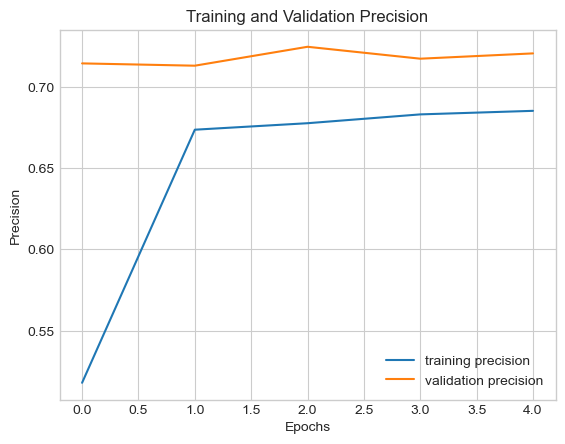

In [ ]:
# Use StratifiedKfold to split data into training and test sets    \
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_score
   
skf = StratifiedKFold(n_splits=10)
fold = 0
train_precision_scores = []
test_precision_scores = []

# Perform Stratified split for training data
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    ds_fold_train = create_dataset_from_dataframe(X_fold_train, y_fold_train, batch_size)
    ds_fold_test = create_dataset_from_dataframe(X_fold_test, y_fold_test, batch_size)
    
    # Apply FeatureSpace for the fold data
    ds_fold_train_with_no_labels = ds_fold_train.map(lambda x, _: x)
    feature_space.adapt(ds_fold_train_with_no_labels)
    
    fold += 1
    crossed_outputs = []
    all_deep_branch_outputs = []

    # Getting unprocessed features here to gain access to each output
    dict_inputs = feature_space.get_inputs()
    
    # Save crossed features into crossed_outputs array  
    for col in feature_space.crossers.keys():
    
        x = setup_embedding_from_crossing(feature_space, col)
        
        # Save these outputs in list to concatenate later
        crossed_outputs.append(x)

    # for each numeric variable, just add it in after embedding
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        all_deep_branch_outputs.append(x)
        
    # for each categorical variable
    for col in categorical_headers:
        
        # get the output tensor from ebedding layer
        x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
        all_deep_branch_outputs.append(x)
            
    model = build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 64, 32, 16, activation='selu')

    # Train the model
    history = model.fit(ds_fold_train, epochs=5, validation_data=ds_fold_test, verbose = 2)

        # Evaluate and store precision scores for each epoch
    for epoch in range(5):
        # Calculate training precision
        y_train_pred = model.predict(ds_fold_train)
        y_train_pred = (y_train_pred > 0.5).astype(int)
        train_precision = precision_score(y_fold_train, y_train_pred)
        train_precision_scores.append(train_precision)

        # Calculate validation precision
        yhat = model.predict(ds_fold_test)
        yhat = (yhat > 0.5).astype(int)
        test_precision = precision_score(y_fold_test, yhat)
        test_precision_scores.append(test_precision)
    
    print(f'Fold {fold} - Precision: {test_precision}')
#     #============================================================================================================================================

# Print average cross-validation score
print(f'Average cross-validation precision: {np.mean(test_precision_scores)}')
# Plot the training and validation precision with history
plt.plot(history.history['precision'], label='training precision')
plt.plot(history.history['val_precision'], label='validation precision')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.show()

In [ ]:
# Evaluate the model for the unseen test set
model.evaluate(ds_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4248 - precision: 0.6521


[0.43365466594696045, 0.6654135584831238]

#### 3.2.2 SELU model with different layers 2
- selu
- 30, 15, 7 layers
- Embedding with square-root of N 

Epoch 1/5
177/177 - 3s - 17ms/step - loss: 0.5227 - precision: 0.3472 - val_loss: 0.4706 - val_precision: 0.7647
Epoch 2/5
177/177 - 0s - 2ms/step - loss: 0.4375 - precision: 0.6752 - val_loss: 0.4042 - val_precision: 0.7067
Epoch 3/5
177/177 - 0s - 2ms/step - loss: 0.4115 - precision: 0.6989 - val_loss: 0.3969 - val_precision: 0.6923
Epoch 4/5
177/177 - 0s - 2ms/step - loss: 0.4086 - precision: 0.6945 - val_loss: 0.3946 - val_precision: 0.6957
Epoch 5/5
177/177 - 0s - 2ms/step - loss: 0.4065 - precision: 0.6930 - val_loss: 0.3925 - val_precision: 0.7021
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 1 - Precision: 0.702127659574468

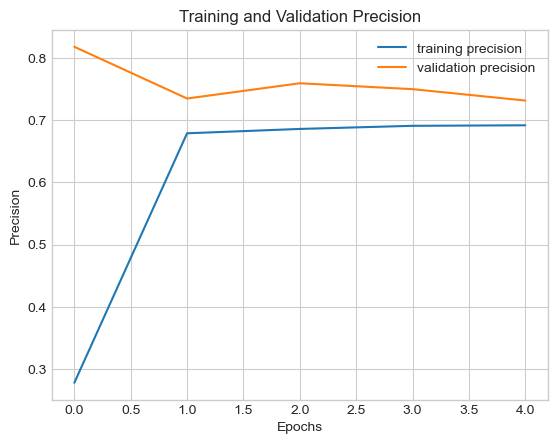

In [ ]:
# Use StratifiedKfold to split data into training and test sets    \
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_score
   
skf = StratifiedKFold(n_splits=10)
fold = 0
train_precision_scores = []
test_precision_scores = []

# Perform Stratified split for training data
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    ds_fold_train = create_dataset_from_dataframe(X_fold_train, y_fold_train, batch_size)
    ds_fold_test = create_dataset_from_dataframe(X_fold_test, y_fold_test, batch_size)
    
    # Apply FeatureSpace for the fold data
    ds_fold_train_with_no_labels = ds_fold_train.map(lambda x, _: x)
    feature_space.adapt(ds_fold_train_with_no_labels)
    
    fold += 1
    crossed_outputs = []
    all_deep_branch_outputs = []

    # Getting unprocessed features here to gain access to each output
    dict_inputs = feature_space.get_inputs()
    
    # Save crossed features into crossed_outputs array  
    for col in feature_space.crossers.keys():
    
        x = setup_embedding_from_crossing(feature_space, col)
        
        # Save these outputs in list to concatenate later
        crossed_outputs.append(x)

    # for each numeric variable, just add it in after embedding
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        all_deep_branch_outputs.append(x)
        
    # for each categorical variable
    for col in categorical_headers:
        
        # get the output tensor from ebedding layer
        x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
        all_deep_branch_outputs.append(x)
            
    model = build_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 30, 15, 7, activation='selu')

    # Train the model
    history = model.fit(ds_fold_train, epochs=5, validation_data=ds_fold_test, verbose = 2)

        # Evaluate and store precision scores for each epoch
    for epoch in range(5):
        # Calculate training precision
        y_train_pred = model.predict(ds_fold_train)
        y_train_pred = (y_train_pred > 0.5).astype(int)
        train_precision = precision_score(y_fold_train, y_train_pred)
        train_precision_scores.append(train_precision)

        # Calculate validation precision
        yhat = model.predict(ds_fold_test)
        yhat = (yhat > 0.5).astype(int)
        test_precision = precision_score(y_fold_test, yhat)
        test_precision_scores.append(test_precision)
    
    print(f'Fold {fold} - Precision: {test_precision}')
#     #============================================================================================================================================

# Print average cross-validation score
print(f'Average cross-validation precision: {np.mean(test_precision_scores)}')
# Plot the training and validation precision with history
plt.plot(history.history['precision'], label='training precision')
plt.plot(history.history['val_precision'], label='validation precision')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.show()

In [ ]:
# Evaluate the model for the unseen test set
model.evaluate(ds_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4248 - precision: 0.6599


[0.43285664916038513, 0.6705426573753357]

#### 3.3 Comparing with Deep Model
- Compare the model with the best performance with a model with only deep branch

In [55]:
def deep_models(dict_inputs, all_deep_branch_outputs, layer_1, layer_2, layer_3, activation = 'relu'):
    
    # merge the deep branches together
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=layer_1,activation=activation, name='deep1')(deep_branch)
    deep_branch = Dense(units=layer_2,activation=activation, name='deep2')(deep_branch)
    deep_branch = Dense(units=layer_3,activation=activation, name='deep3')(deep_branch)
    
        
    # Merge deep and wide branches
    final_branch = deep_branch
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)  
    training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["precision"]
    )
    
    return training_model

Epoch 1/5
177/177 - 3s - 17ms/step - loss: 0.4987 - precision: 0.5017 - val_loss: 0.4367 - val_precision: 0.6667
Epoch 2/5
177/177 - 0s - 2ms/step - loss: 0.4275 - precision: 0.6572 - val_loss: 0.4156 - val_precision: 0.6860
Epoch 3/5
177/177 - 0s - 2ms/step - loss: 0.4211 - precision: 0.6635 - val_loss: 0.4106 - val_precision: 0.6630
Epoch 4/5
177/177 - 0s - 2ms/step - loss: 0.4179 - precision: 0.6686 - val_loss: 0.4060 - val_precision: 0.7000
Epoch 5/5
177/177 - 0s - 2ms/step - loss: 0.4148 - precision: 0.6705 - val_loss: 0.4045 - val_precision: 0.6882
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 1 - Precision: 0.6881720430107527


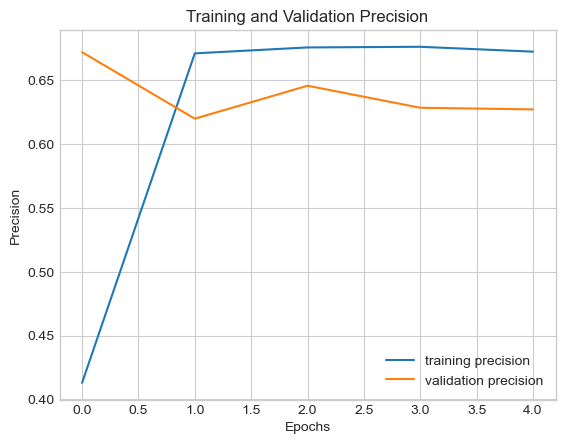

In [56]:
# Use StratifiedKfold to split data into training and test sets    \
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
   
skf = StratifiedKFold(n_splits=10)
fold = 0
train_precision_scores = []
test_precision_scores = []

# Perform Stratified split for training data
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold_train, X_fold_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_fold_train, y_fold_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    ds_fold_train = create_dataset_from_dataframe(X_fold_train, y_fold_train, batch_size)
    ds_fold_test = create_dataset_from_dataframe(X_fold_test, y_fold_test, batch_size)
    
    # Apply FeatureSpace for the fold data
    ds_fold_train_with_no_labels = ds_fold_train.map(lambda x, _: x)
    feature_space.adapt(ds_fold_train_with_no_labels)
    
    fold += 1
    crossed_outputs = []
    all_deep_branch_outputs = []

    # Getting unprocessed features here to gain access to each output
    dict_inputs = feature_space.get_inputs()
    
    # Save crossed features into crossed_outputs array  
    for col in feature_space.crossers.keys():
    
        x = setup_embedding_from_crossing(feature_space, col)
        
        # Save these outputs in list to concatenate later
        crossed_outputs.append(x)

    # for each numeric variable, just add it in after embedding
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        all_deep_branch_outputs.append(x)
        
    # for each categorical variable
    for col in categorical_headers:
        
        # get the output tensor from ebedding layer
        x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
        all_deep_branch_outputs.append(x)
            
    model = deep_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 64, 32, 16, activation='selu')

    # Train the model
    history = model.fit(ds_fold_train, epochs=5, validation_data=ds_fold_test, verbose = 2)

        # Evaluate and store precision scores for each epoch
    for epoch in range(5):
        # Calculate training precision
        y_train_pred = model.predict(ds_fold_train)
        y_train_pred = (y_train_pred > 0.5).astype(int)
        train_precision = precision_score(y_fold_train, y_train_pred)
        train_precision_scores.append(train_precision)

        # Calculate validation precision
        yhat = model.predict(ds_fold_test)
        yhat = (yhat > 0.5).astype(int)
        test_precision = precision_score(y_fold_test, yhat)
        test_precision_scores.append(test_precision)
    
    print(f'Fold {fold} - Precision: {test_precision}')
#     #============================================================================================================================================

# Print average cross-validation score
print(f'Average cross-validation precision: {np.mean(test_precision_scores)}')

# Plot the training and validation precision with history
plt.plot(history.history['precision'], label='training precision')
plt.plot(history.history['val_precision'], label='validation precision')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.show()

The average precision score of the deep only network is slightly lower than wide and deep network(Average cross-validation precision: 0.6502 vs. Wide-and-deep: 0.7030)<br><br>
The reason for it may lie on the fact that the dataset is relatively small( <5k), which may make the deep only network hard to generalize.<br>
Whereas, the wide-and-deep network has an advantage of leveraging more features at the same time, leading to a better perfomance.

In [5]:
import numpy as np

deep_only_precision_scores = [
    0.688, 0.631, 0.638, 0.723, 0.624,
    0.602, 0.667, 0.6454545454545455,
    0.6571428571428571, 0.6272727272727273
]
selu_best_precision_scores = [
    0.7093023255813954,
    0.6923076923076923,
    0.7288135593220338,
    0.6835443037974683,
    0.7105263157894737,
    0.7051282051282052,
    0.72,
    0.7,
    0.6612903225806451,
    0.7204301075268817
]

The model is unstable so I collected the precision scores from the results.

In [7]:
def confidence_interval(critA, critB):
    e = (1 - np.array(critA)) - (1 - np.array(critB))    
    t = 2.26/np.sqrt(10)
    stdtot = np.std(e)
    dbar = np.mean(e)
    return dbar - t*stdtot, dbar+t*stdtot
print("deep_only model vs. best wide-deep model: ", confidence_interval(deep_only_precision_scores, selu_best_precision_scores))


deep_only model vs. best wide-deep model:  (0.02195060478896216, 0.08374393564377096)


First of all, the two models does not have 0 in the confidence interval with 95% confidence, which means that there is a statistically significant difference between the two models.<br
The wide and deep model has higher mean precision scores.<br>
And the entire range is positive at each confidence interval<br><br>

Therefore, the wide and deep model has a better precision with 95% confidence.


#### 3.4 ROC Curve Comparison

In [20]:
def deep_models(dict_inputs, all_deep_branch_outputs, layer_1, layer_2, layer_3, activation = 'relu'):
    
    # merge the deep branches together
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=layer_1,activation=activation, name='deep1')(deep_branch)
    deep_branch = Dense(units=layer_2,activation=activation, name='deep2')(deep_branch)
    deep_branch = Dense(units=layer_3,activation=activation, name='deep3')(deep_branch)
    
        
    final_branch = deep_branch
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)  
    training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=[keras.metrics.AUC()]
    )
    
    return training_model

def wide_deep_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, layer_1, layer_2, layer_3, activation = 'relu'):
    # Concatenate the outputs and add a fully connected layer
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)
    
    # merge the deep branches together
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=layer_1,activation=activation, name='deep1')(deep_branch)
    deep_branch = Dense(units=layer_2,activation=activation, name='deep2')(deep_branch)
    deep_branch = Dense(units=layer_3,activation=activation, name='deep3')(deep_branch)
    
        
    # Merge deep and wide branches
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)  
    training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=[keras.metrics.AUC()]
    )
    
    return training_model

#### 3.4.1. Deep Only Model ROC Curve

In [106]:
crossed_outputs = []
all_deep_branch_outputs = []
precision_scores = []
# Getting unprocessed features here to gain access to each output
dict_inputs = feature_space.get_inputs()

# Save crossed features into crossed_outputs array  
for col in feature_space.crossers.keys():
    x = setup_embedding_from_crossing(feature_space, col)
    # Save these outputs in list to concatenate later
    crossed_outputs.append(x)

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    x = Lambda(lambda t: tf.cast(t, tf.float32))(x)
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)

    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


deep_only_model = deep_models(dict_inputs, all_deep_branch_outputs, 64, 32, 16)

history_d = deep_only_model.fit(ds_train, epochs=5, validation_data=ds_test, verbose = 2)

# Evaluate deep models
loss_deep_only, auc_deep_only = deep_only_model.evaluate(ds_test)



Epoch 1/5
197/197 - 3s - 16ms/step - auc_85: 0.5338 - loss: 0.5747 - val_auc_85: 0.7028 - val_loss: 0.4910
Epoch 2/5
197/197 - 0s - 2ms/step - auc_85: 0.7831 - loss: 0.4413 - val_auc_85: 0.7990 - val_loss: 0.4211
Epoch 3/5
197/197 - 0s - 2ms/step - auc_85: 0.8135 - loss: 0.4131 - val_auc_85: 0.8015 - val_loss: 0.4183
Epoch 4/5
197/197 - 0s - 2ms/step - auc_85: 0.8183 - loss: 0.4084 - val_auc_85: 0.8009 - val_loss: 0.4173
Epoch 5/5
197/197 - 0s - 2ms/step - auc_85: 0.8221 - loss: 0.4054 - val_auc_85: 0.8018 - val_loss: 0.4166
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_85: 0.8127 - loss: 0.3968


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


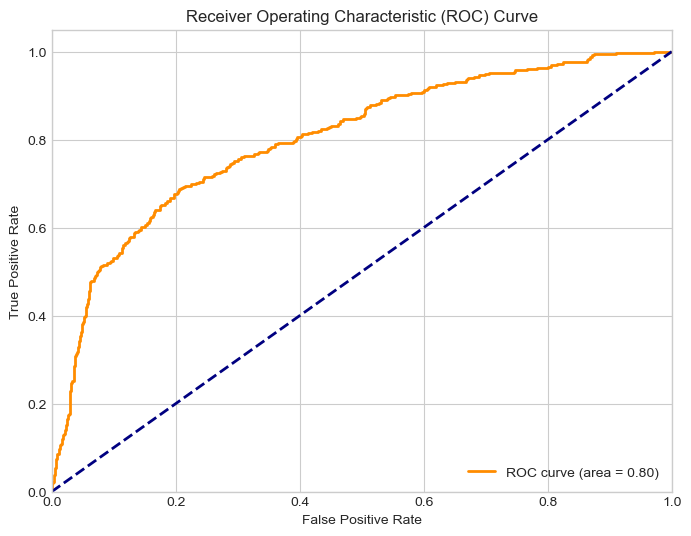

In [107]:
from sklearn.metrics import roc_curve, auc

tp = np.concatenate([y for x, y in ds_test], axis=0)
y_pred = deep_only_model.predict(ds_test)

# Step 2: Compute ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(tp, y_pred)
roc_auc = auc(fpr, tpr)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Area Under the Curve(AUC) ranges from 0 to 1, where 1 is perfectly telling positive from negative and 0.5 being random guessing.<br>
The deep only model shows AUC of 0.8127, indication good performance.<br> The model can strongly tell between positive and negative classes.<br>
In terms of business, the model can give high probability to a customer who will positively respond to the campaign 80% of the time.

In [ ]:
wide_deep_model = wide_deep_models(dict_inputs, crossed_outputs, all_deep_branch_outputs, 64, 32, 16)

history_wd = wide_deep_model.fit(ds_train, epochs=5, validation_data=ds_test, verbose = 2)

# Evaluate wide and deep models
loss_wide_deep, auc_wide_deep = wide_deep_model.evaluate(ds_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

tp = np.concatenate([y for x, y in ds_test], axis=0)
y_pred = wide_deep_model.predict(ds_test)

# Step 2: Compute ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(tp, y_pred)
roc_auc = auc(fpr, tpr)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 4. Exceptional work

#### 4.1 Extract Embedding weights

In [89]:
crossed_outputs = []
all_deep_branch_outputs = []
precision_scores = []
# Getting unprocessed features here to gain access to each output
dict_inputs = feature_space.get_inputs()

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    x = Lambda(lambda t: tf.cast(t, tf.float32))(x)
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)

deep_only_model = deep_models(dict_inputs, all_deep_branch_outputs, 64, 32, 16)


history_d = deep_only_model.fit(ds_train, epochs=5, validation_data=ds_test, verbose = 2)

# Evaluate both models
loss_deep_only, auc_deep_only = deep_only_model.evaluate(ds_test)


Epoch 1/5
197/197 - 3s - 16ms/step - auc_84: 0.6602 - loss: 0.5118 - val_auc_84: 0.7817 - val_loss: 0.4383
Epoch 2/5
197/197 - 0s - 2ms/step - auc_84: 0.8041 - loss: 0.4215 - val_auc_84: 0.7980 - val_loss: 0.4227
Epoch 3/5
197/197 - 0s - 2ms/step - auc_84: 0.8144 - loss: 0.4119 - val_auc_84: 0.8027 - val_loss: 0.4197
Epoch 4/5
197/197 - 0s - 2ms/step - auc_84: 0.8187 - loss: 0.4081 - val_auc_84: 0.8041 - val_loss: 0.4180
Epoch 5/5
197/197 - 0s - 2ms/step - auc_84: 0.8216 - loss: 0.4059 - val_auc_84: 0.8048 - val_loss: 0.4170
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_84: 0.8179 - loss: 0.3946


From the trained model, embedding data will be extracted.

In [79]:
from sklearn.decomposition import PCA

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


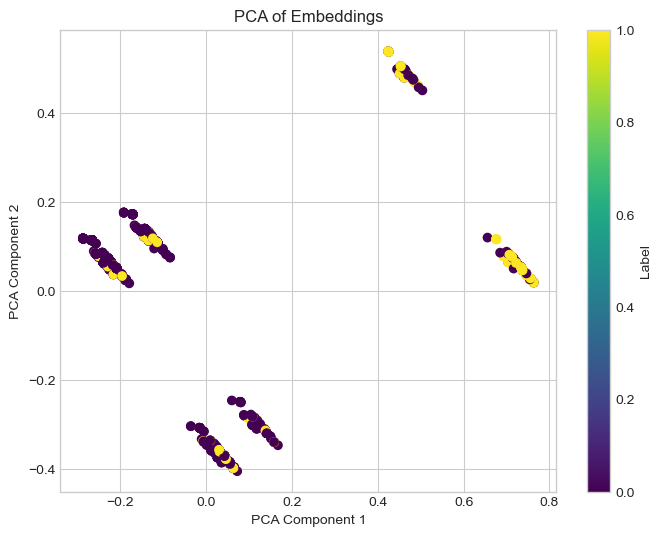

In [102]:
# Extract the embedding layers
embedding_layers = [layer for layer in deep_only_model.layers if isinstance(layer, Embedding)]

# Model to get embeddings
embedding_models = [keras.Model(inputs=deep_only_model.input, outputs=layer.output) for layer in embedding_layers]

# Pass the embedding data through the model
embedding_data = [model.predict(ds_test) for model in embedding_models]

# Flatten and concatenate all embeddings if there are multiple embedding layers
flattened_embeddings = np.hstack([emb.reshape((emb.shape[0], -1))  for emb in embedding_data])

# Convert tensorflow dataset to numpy array
y_test = np.concatenate([y for x, y in ds_test], axis=0)

# Perform Dimensionality reduction
pca = PCA(n_components=3)
pca_result = pca.fit_transform(flattened_embeddings)

#=============================================================================#

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_test, cmap='viridis')  # Adjust as necessary
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Embeddings')
plt.colorbar(scatter, label='Label')
plt.show()

According to the PCA clusters, there are 6 distinct clusters.<br><br>
As the classification is binary, the dots are either yellow or purple, representing 'yes' or 'no' to the campaign.<br><br>
The right most cluster shows mostly yellow dots, meaning that those features highly predict the success of the campaign of openning a term deposit.<br><br>
The other clusters show dominantly unsuccessful features for clients to open a term deposit in the presence of some successes.<br><br>
Therefore, the bank can focus more on clients with the combinations of features located on the right most cluster to be successful. 


### Reference

Source: Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.